The purpose of this note book is to quickly impliment a version of the xylem imparment, growth and death described in section 2.6 of [A.Pahchalis et al 2023](https://pubmed.ncbi.nlm.nih.gov/37962234/).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Introduction

## Historic xylem imparement

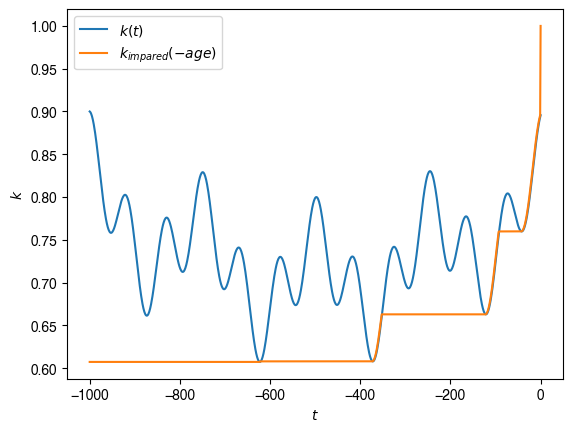

In [2]:
def impare_xylem(k_current, k_impared):
    return np.clip(k_impared, 0, k_current)

time_steps = 1000

time = np.linspace(0, 1000, time_steps)

k_current_timeseries = np.ones(time_steps)
k_impared_history = np.ones(time_steps)

for i in range(time_steps):
    k_current_timeseries[i] = 0.1*np.cos(time[i]/40) * np.cos(time[i]/20) - 0.1*np.sin(np.pi*time[i]/1000) + 0.8

    k_impared_history[:i] = impare_xylem(k_current_timeseries[i], k_impared_history[:i])

plt.plot(time - time[-1], k_current_timeseries, label = "$k(t)$")
plt.plot(time - time[-1], k_impared_history, label = "$k_{impared}(-age)$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$k$")
plt.show()

# Xylem population

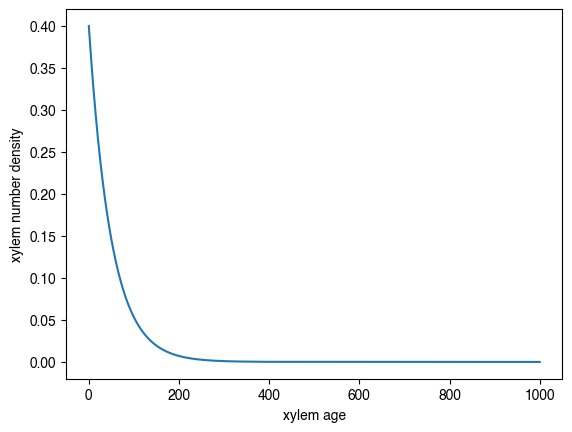

In [12]:
def turnover_rate(age, time):
    return np.ones(len(age))*0.02

age  = np.linspace(time[-1], time[0], time_steps)

growth_rate = 0.4
pop_age_dist = np.ones(time_steps) * growth_rate

for i in range(time_steps):
    pop_age_dist[:i] -= turnover_rate(age[len(age)-i:],time[i]) * pop_age_dist[:i]

plt.plot(age, pop_age_dist)
plt.xlabel("xylem age")
plt.ylabel("xylem number density")
plt.show()

# Conductance

/var/folders/qd/r8_04ccx1hlf_x0k_jfklmv40000gq/T/ipykernel_79191/1322387943.py:16: RuntimeWarning: invalid value encountered in scalar divide
  PLC[i] = conductance(k_impared_history[:i], pop_age_dist[:i]) / np.sum(pop_age_dist[:i])


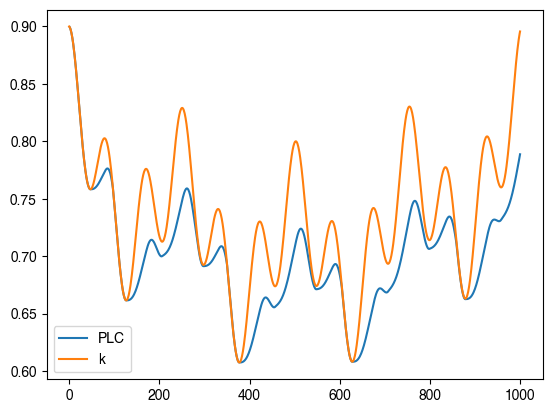

In [13]:
def conductance(k_impared_history, pop_age_dist):
    return np.sum(k_impared_history*pop_age_dist)

PLC = np.zeros(time_steps)

# We need to reset these values and clculate them over time
k_impared_history = np.ones(time_steps)
pop_age_dist = np.ones(time_steps) * growth_rate

for i in range(time_steps):

    # Update the impared conductance and age distribution
    k_impared_history[:i] = impare_xylem(k_current_timeseries[i], k_impared_history[:i])
    pop_age_dist[:i] -= turnover_rate(age[len(age)-i:],time[i]) * pop_age_dist[:i]

    PLC[i] = conductance(k_impared_history[:i], pop_age_dist[:i]) / np.sum(pop_age_dist[:i])

plt.plot(time, PLC, label = "PLC")
plt.plot(time, k_current_timeseries, label = "k")
plt.legend()
plt.show()